<a href="https://colab.research.google.com/github/Mahikarimib/Machine-Learning-/blob/main/final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import  pandas as  pd

In [29]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

df= pd.read_csv('/content/gdrive/My Drive/test.csv')
df = pd.DataFrame(df) 
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,F1,F2,F3,F4,target
0,a1,10,50,12,1
1,a2,12,110,11,1
2,a3,13,90,12,1
3,a4,86,35,7,1
4,a5,10,70,9,1


In [30]:
dfd = df.drop( ['F1'] , axis=1 )
X = dfd.drop( ['target'] , axis = 1 )
y = dfd['target']

In [31]:
from  sklearn.naive_bayes       import  GaussianNB
from  sklearn.neighbors         import  KNeighborsClassifier
from  sklearn.ensemble          import  RandomForestClassifier

In [32]:
#NB  = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors=9)
RF  = RandomForestClassifier(criterion='gini',n_estimators=10 ,max_depth=3,random_state=0)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
Xtrain.shape

(35, 3)

In [36]:
ytest.shape

(15,)

In [37]:
ytest

28    1
11    1
10    1
41    0
2     1
27    1
38    0
31    0
22    1
4     1
33    0
35    0
26    1
34    0
18    1
Name: target, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
Xtest  = scaler.transform(Xtest)

In [39]:
#NB.fit (Xtrain , ytrain)
#KNN.fit(Xtrain , ytrain)
RF.fit (Xtrain , ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [40]:
#ypNB   = NB.predict(Xtest)
#ypKNN  = KNN.predict(Xtest)
ypRF   = RF.predict(Xtest)

In [41]:
from  sklearn.metrics   import  classification_report

In [42]:
print(classification_report(ytest, ypRF , target_names=['CLASS2', 'CLASS1'] ))

              precision    recall  f1-score   support

      CLASS2       0.75      0.50      0.60         6
      CLASS1       0.73      0.89      0.80         9

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15



In [43]:
from  sklearn.metrics   import  confusion_matrix

In [44]:
confusion_matrix(ytest, ypRF)

array([[3, 3],
       [1, 8]])

In [45]:
#NB.score (Xtrain , ytrain)  
#KNN.score(Xtrain , ytrain)   
RF.score (Xtrain , ytrain)

1.0

In [46]:
#NB.score (Xtest , ytest)   
#KNN.score(Xtest , ytest)  
RF.score (Xtest , ytest)

0.7333333333333333

In [47]:
import  numpy  as  np

In [48]:
from  sklearn.model_selection   import  cross_val_score

In [49]:
#np.mean(cross_val_score(NB  , X , y , cv=10))   
#np.mean(cross_val_score(KNN , X , y , cv=10))   
np.mean(cross_val_score(RF  , X , y , cv=10))   

0.8800000000000001

In [50]:
from  sklearn.metrics  import  roc_curve, auc
from  sklearn.model_selection   import  StratifiedKFold
from  scipy  import  interp
import  matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/

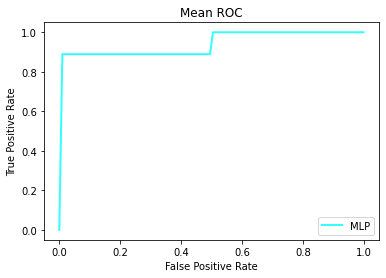

In [52]:
cv = StratifiedKFold(n_splits = 6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    cf = RF.fit(Xtrain, ytrain)
    probas_ = cf.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i += 1    
    
            
mean_tpr      = np.mean(tprs, axis=0)
mean_tpr[-1]  = 1.0
mean_auc      = auc(mean_fpr, mean_tpr)
std_auc       = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='cyan',label=r'MLP' ,lw=2, alpha=.8)
std_tpr    = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Mean ROC')
plt.legend(loc="lower right");

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Xf = SelectKBest(chi2, k=1).fit_transform(X, y)
Xf

array([[ 10],
       [ 12],
       [ 13],
       [ 86],
       [ 10],
       [ 17],
       [ 18],
       [ 20],
       [ 80],
       [ 19],
       [ 15],
       [ 75],
       [ 30],
       [ 14],
       [ 16],
       [ 18],
       [ 67],
       [ 12],
       [ 11],
       [ 13],
       [ 16],
       [ 17],
       [ 11],
       [ 10],
       [ 20],
       [ 15],
       [ 16],
       [ 17],
       [ 12],
       [ 18],
       [ 80],
       [100],
       [ 90],
       [ 20],
       [ 16],
       [ 93],
       [ 94],
       [ 98],
       [ 85],
       [ 80],
       [ 88],
       [ 12],
       [ 99],
       [ 91],
       [ 92],
       [ 93],
       [ 87],
       [ 82],
       [ 19],
       [105]])

In [54]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True) 
xfs = model.transform(X)
xfs

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[ 10,  50],
       [ 12, 110],
       [ 13,  90],
       [ 86,  35],
       [ 10,  70],
       [ 17,  80],
       [ 18,  85],
       [ 20,  25],
       [ 80,  55],
       [ 19,  59],
       [ 15,  67],
       [ 75,  75],
       [ 30,  73],
       [ 14,  79],
       [ 16,  87],
       [ 18,  92],
       [ 67,  94],
       [ 12, 105],
       [ 11,  50],
       [ 13,  53],
       [ 16,  69],
       [ 17,  87],
       [ 11,  79],
       [ 10,  67],
       [ 20,  72],
       [ 15,  71],
       [ 16,  70],
       [ 17,  59],
       [ 12,  60],
       [ 18,  70],
       [ 80,   1],
       [100,  40],
       [ 90,  52],
       [ 20,  34],
       [ 16,  42],
       [ 93,  14],
       [ 94,  16],
       [ 98,  24],
       [ 85,  43],
       [ 80, 140],
       [ 88,  38],
       [ 12,  29],
       [ 99,  39],
       [ 91,  18],
       [ 92,  16],
       [ 93,  12],
       [ 87,   5],
       [ 82,  38],
       [ 19,  30],
       [105,  12]])

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.46563257, 0.40924337, 0.12512406])